# `hw1`: Explore the Argo data

In [ ]:
# Fill in this cell with your personal details:
# - Name: xxx
# - Student ID: xxx
# - Email: xxx

In this homework, you will have to fetch, manipulate and visualize the Argo data. You will explore this dataset using numpy, pandas and matplotlib.

Deadline: **Monday, October 31**. 
- Submit your completed notebook on your personal Github repository created when accepting the assignment. 
- All cells must be executable and their outputs should not be erased before submission.
- Homeworks are carried out *alone*.

# Argo: a window into the ocean

(Excerpt from [`argopy`](https://argopy.readthedocs.io/en/latest/what_is_argo.html).)

The ocean is a key component of the Earth climate system. It thus needs a continuous real-time monitoring to help scientists better understand its dynamic and predict its evolution. All around the world, oceanographers have managed to join their efforts and set up a Global Ocean Observing System among which Argo is a key component.

Argo is a global network of nearly 4000 autonomous probes measuring pressure, temperature and salinity from the surface to 2000m depth every 10 days. The localisation of these probes is nearly random between the 60th parallels. All probes data are collected by satellite in real-time, processed by several data centers and finally merged in a single dataset (collecting more than 2 millions of vertical profiles data).

The Argo array reached its full global coverage (of 1 profile per month and per 3x3 degree horizontal area) in 2007, and continuously pursues its evolution to fulfill new scientific requirements (Roemmich et al, 2019). It now extents to higher latitudes and some of the floats are able to profile down to 4000m and 6000m. New floats are also equipped with biogeochemical sensors, measuring oxygen and chlorophyll for instance. Argo is thus providing a deluge of in situ data: more than 400 profiles per day.

Each Argo probe is an autonomous, free drifting, profiling float, i.e. a probe that can’t control its trajectory but is able to control its buoyancy and thus to move up and down the water column as it wishes. Argo floats continuously operate the same program, or cycle, illustrated in the figure below. After 9 to 10 days of free drift at a parking depth of about 1000m, a typical Argo float dives down to 2000m and then shoals back to the surface while measuring pressure, temperature and salinity. Once it reaches the surface, the float sends by satellite its measurements to a data center where they are processed in real time and made freely available on the web in less than 24h00.

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="50%" />

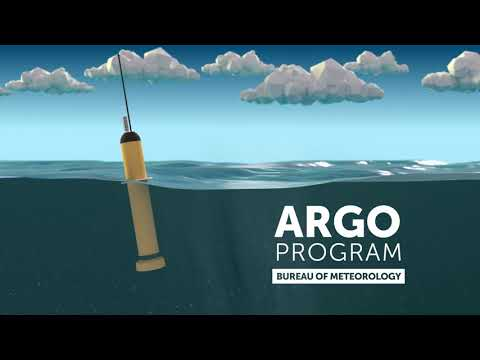

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("YkctZlQgU0g")

# Getting started

To get started, make sure you have numpy, pandas, matplotlib installed in your environment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will make use of `argopy` to fetch the Argo data, which can be installed using `pip install argopy`.

In [1]:
import argopy  

ModuleNotFoundError: No module named 'argopy'

Before diving further, take some time to explore the Argo data using the [Euro-Argo fleet monitoring tool](https://fleetmonitoring.euro-argo.eu/dashboard). If needed, the dashboard can be started directly from Jupyter:

In [ ]:
argopy.dashboard()

The API to fetch the Argo data is described below, but helpful additional resources include:
- [the argopy documentation](https://argopy.readthedocs.io/en/latest/index.html)
- [the Argo project](https://argo.ucsd.edu/)

# Loading Argo data

In [ ]:
# Fetching data for one or more floats
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

floats = argo_loader.float([6902746, 6902755])  # Pass a list of WMO float identifiers
floats = floats.load()      # download the data
df = floats.to_dataframe()  # convert to a pandas dataframe

In [ ]:
df.head(3)

In [ ]:
# A profile is defined by a (WMO id, cycle number) pair
# These are respectively defined in PLATFORM_NUMBER and CYCLE_NUMBER
profile = df.query("PLATFORM_NUMBER == 6902746 and CYCLE_NUMBER == 5")
profile.head(3)

In [ ]:
# `profile()` provides a shortcut for loading one or more profiles 
profile = argo_loader.profile(6902746, [5]).load().to_dataframe()
profile.head(3)

In [ ]:
# `region()` loads float data for a space/time domain
df = argo_loader.region([-60, -55, 40., 45., 0., 10., '2007-08-01', '2007-09-01']).load().to_dataframe()
df.head(3)

In [ ]:
# Argo metadata can accessed in the same way
from argopy import IndexFetcher as ArgoIndexFetcher
argo_index = ArgoIndexFetcher()

idx = argo_index.float([6902746, 6902755])  # Pass a list of WMO float identifiers
idx = idx.load()
df = idx.to_dataframe()

In [ ]:
df.head(3)

In [ ]:
# ... or request metadata for a space/time domain
df = argo_index.region([-60, -55, 40., 45., '2007-08-01', '2007-09-01']).load().to_dataframe()
df.head(3)

# Exercices

- Solve the exercises below by making the best use of the API offered in numpy, pandas or matplotlib. 
- For plots, you are free to use either matplotlib and pandas' built-in plotting functions.
- Follow the data visualization principles as best as possible to make your plots effective and readable.
- Feel free to add comments if necessary.

## Individual float data

<div class="alert alert-success">
    
**Exercise**. Plot the joint temperature-pressure, salinity-pressure, salinity-temperature measurements collected along the `(PLATFORM_NUMBER=6900583, CYCLE_NUMBER=100)` profile.
    
</div>

<div class="alert alert-success">
    
**Exercise**. Plot histograms of the temperature and salinity measurements collected along the same profile.
    
</div>

<div class="alert alert-success">
    
**Exercise**. On a single figure, plot as a function of time all temperature-pressure measurements of `6900583` since its launch.
    
</div>

<div class="alert alert-success">
    
**Exercise**. From the Argo metadata, retrieve and plot the trajectory of float `6900583`.
    
</div>

## Regional float data

<div class="alert alert-warning">
    
**Tips**. The data (or metadata) required for the exercises below can be quite long to download and prepare. We recommend to download the data once and then save it on disk (e.g., using one of Pandas' export functions).
    
</div>

<div class="alert alert-success">
    
**Exercise**. Plot the temperature-pressure, salinity-pressure, temperature-salinity measurements of profile data collected between -50 and 0° of longitude and between 45 and 50° of latitude for 2021.
    
Consider how to best represent the variability of the measurements.
    
</div>

<div class="alert alert-success">
    
**Exercise**. For the floats passing by the region between -50 and 0° of longitude and between 45 and 50° of latitude between 2000 and 2022, compute and show the lengths of their trajectories. (Note: use the metadata.)

</div>

<div class="alert alert-success">
    
**Exercise**. Using the yearly January data from 2000 to 2022 collected between -50 and 0° of longitude and between 45 and 50° of latitude, show the evolution of the temperature and salinity at sea level.
    
</div>

<div class="alert alert-success">
    
**Exercise**. Using the yearly January data from 2000 to 2022 collected between -50 and 0° of longitude and between 45 and 50° of latitude, show and compare the evolution of the temperature at pressure levels 0, 10, 500 and 1000.
    
</div>